In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
city_data = pd.read_csv('zecon/City_time_series.csv',parse_dates=['Date'])
city_df = city_data[city_data['ZHVI_AllHomes'].notnull()]
city_ZHVI = city_df[['Date','RegionName','ZHVI_AllHomes']]

In [3]:
def get_city(cityName):
    city_df = city_ZHVI.loc[city_ZHVI['RegionName'] == cityName]
    city = city_df[['Date','ZHVI_AllHomes']]
    city_date = city['Date']
    city_index = city.set_index(city['Date'])
    city_index = city_index[['ZHVI_AllHomes']]
    city_train_size = int(len(city_index) * 0.80)
    city_train, city_test = city_index[0:city_train_size], city_index[city_train_size:]
    city_return = []
    city_return.append(city_train)
    city_return.append(city_test)
    city_return.append(city_date)
    return(city_return)

In [4]:
def plot_city(training):
    plt.plot(training)
    plt.show()
    
    diff1 = training['ZHVI_AllHomes'].diff(1)
    plt.plot(diff1)
    plt.show()

    diff2 = diff1.diff(1)
    plt.plot(diff2)
    plt.show()
    
    plot_acf(training, lags=50)
    plt.show()
    plot_pacf(training, lags=50)
    plt.show()

In [5]:
def city_ARIMA(city, p, d, q):
    model = ARIMA(city[0], order=(p,d,q))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    predicted = model_fit.forecast(steps=len(city[1]))
    test = city[1]['ZHVI_AllHomes'].tolist()
    true, pred = np.array(test), np.array(predicted[0])
    mape = np.mean(np.abs((true - pred) / true)) * 100
    print("MAPE: " + str(mape))
    return(predicted[0])

In [6]:
def city_output(city, predicted):
    training = city[0]
    testing = city[1]
    date = city[2]
    training_value = training['ZHVI_AllHomes'].tolist()
    testing_value = testing['ZHVI_AllHomes'].tolist()
    predicted_plot = [*training_value, *predicted]
    testing_plot = [*training_value, *testing_value]
    plt.plot(date, testing_plot)
    plt.plot(date, predicted_plot)
    plt.show()

In [7]:
los = get_city('los_altossanta_claraca')
palo = get_city('palo_altosanta_claraca')
sara = get_city('saratogasanta_claraca')
palos = get_city('palos_verdes_estateslos_angelesca')
menlo = get_city('menlo_parksan_mateoca')

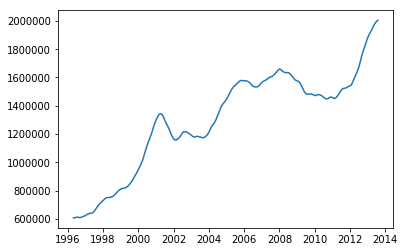

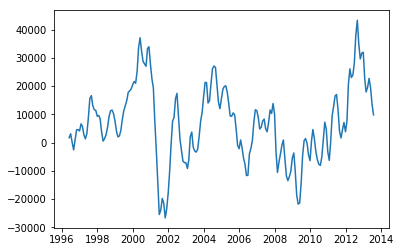

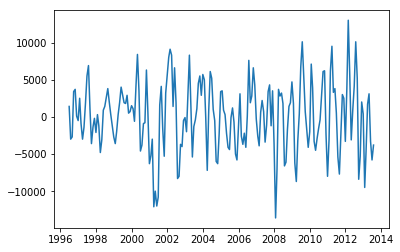

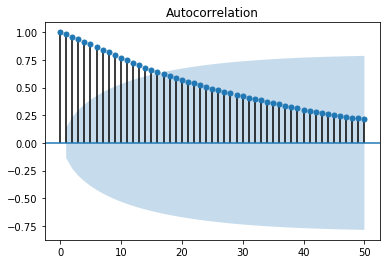

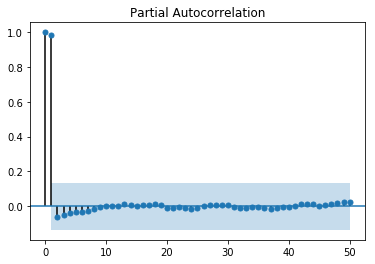

In [8]:
plot_city(los[0])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as 

                             ARIMA Model Results                              
Dep. Variable:       D2.ZHVI_AllHomes   No. Observations:                  206
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1971.371
Method:                       css-mle   S.D. of innovations           3459.529
Date:                Wed, 01 May 2019   AIC                           3950.742
Time:                        22:55:49   BIC                           3964.053
Sample:                    06-30-1996   HQIC                          3956.125
                         - 07-31-2013                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     68.1305    348.047      0.196      0.845    -614.028     750.289
ar.L1.D2.ZHVI_AllHomes     0.7663      0.062     12.409      0.000       0.645       0.887
ar.L

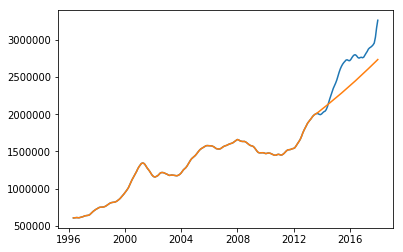

In [9]:
los_predicted = city_ARIMA(los, 2, 2, 0)
city_output(los, los_predicted)

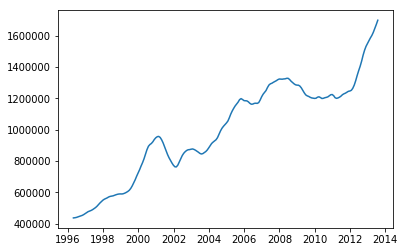

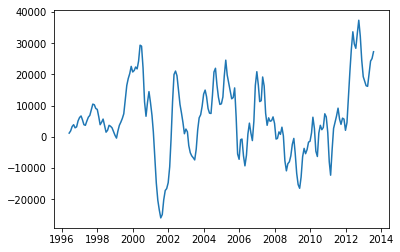

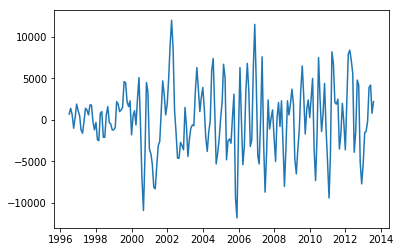

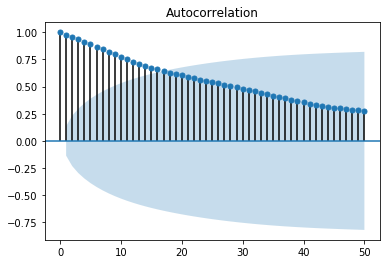

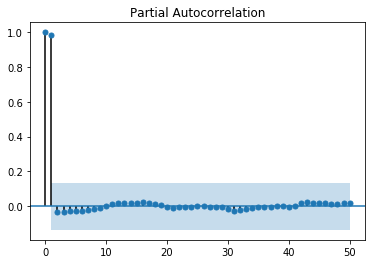

In [10]:
plot_city(palo[0])

                             ARIMA Model Results                              
Dep. Variable:       D2.ZHVI_AllHomes   No. Observations:                  206
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1941.175
Method:                       css-mle   S.D. of innovations           2986.801
Date:                Wed, 01 May 2019   AIC                           3890.350
Time:                        22:55:50   BIC                           3903.662
Sample:                    06-30-1996   HQIC                          3895.734
                         - 07-31-2013                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    126.6990    287.533      0.441      0.660    -436.855     690.253
ar.L1.D2.ZHVI_AllHomes     0.7921      0.059     13.355      0.000       0.676       0.908
ar.L

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


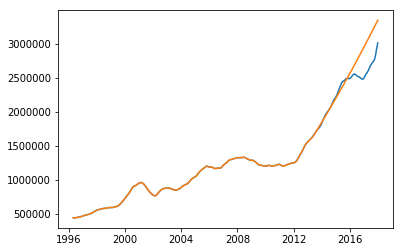

In [11]:
palo_predicted = city_ARIMA(palo, 2, 2, 0)
city_output(palo, palo_predicted)

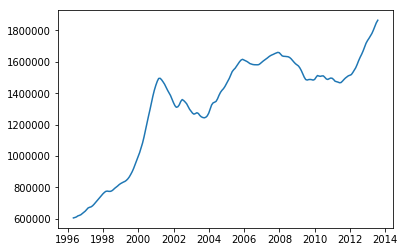

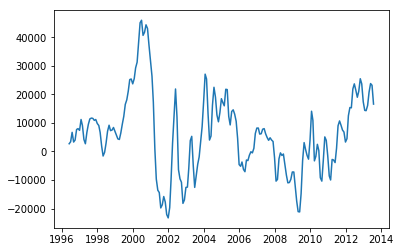

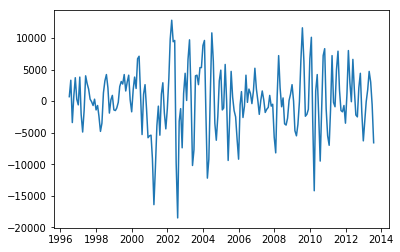

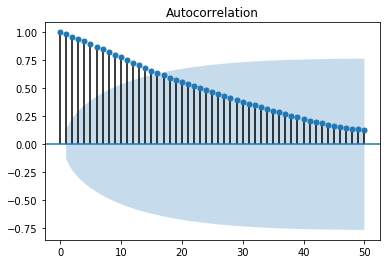

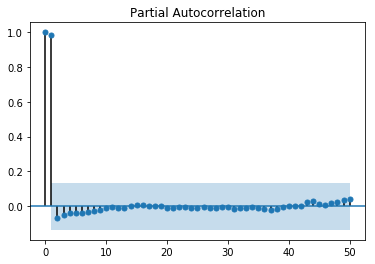

In [12]:
plot_city(sara[0])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.ZHVI_AllHomes   No. Observations:                  206
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1991.752
Method:                       css-mle   S.D. of innovations           3819.377
Date:                Wed, 01 May 2019   AIC                           3991.505
Time:                        22:55:51   BIC                           4004.816
Sample:                    06-30-1996   HQIC                          3996.889
                         - 07-31-2013                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     54.6010    342.106      0.160      0.873    -615.915     725.117
ar.L1.D2.ZHVI_AllHomes     0.7054      0.061     11.553      0.000       0.586       0.825
ar.L

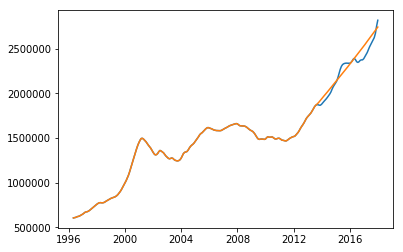

In [13]:
sara_predicted = city_ARIMA(sara, 2, 2, 0)
city_output(sara, sara_predicted)

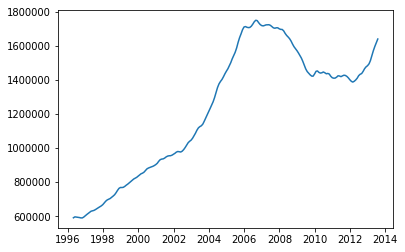

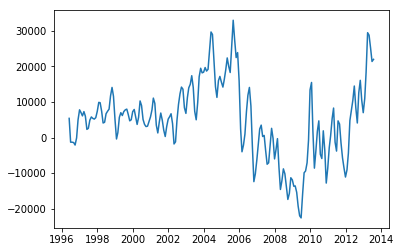

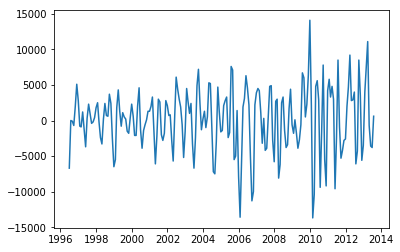

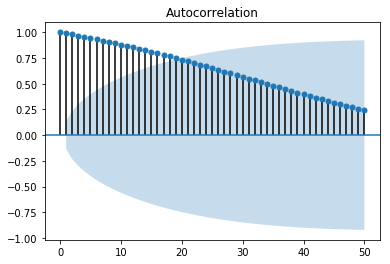

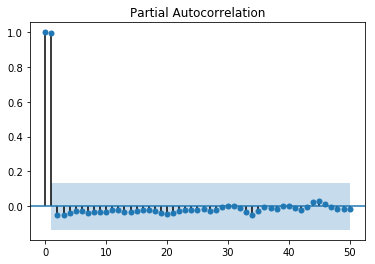

In [14]:
plot_city(palos[0])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.ZHVI_AllHomes   No. Observations:                  207
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2007.194
Method:                       css-mle   S.D. of innovations           3914.194
Date:                Wed, 01 May 2019   AIC                           4022.388
Time:                        22:55:52   BIC                           4035.719
Sample:                    05-31-1996   HQIC                          4027.779
                         - 07-31-2013                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5619.2491   2162.391      2.599      0.010    1381.041    9857.457
ar.L1.D.ZHVI_AllHomes     1.3000      0.063     20.652      0.000       1.177       1.423
ar.L2.D.

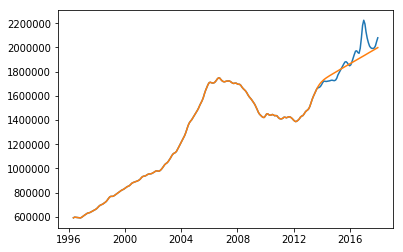

In [15]:
palos_predicted = city_ARIMA(palos, 2, 1, 0)
city_output(palos, palos_predicted)

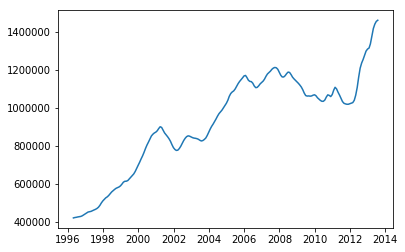

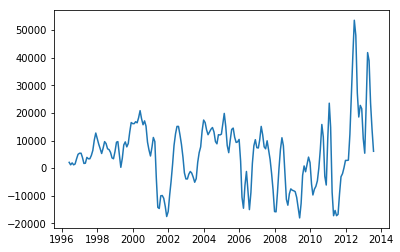

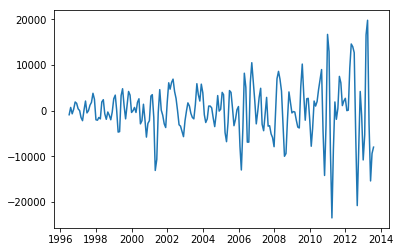

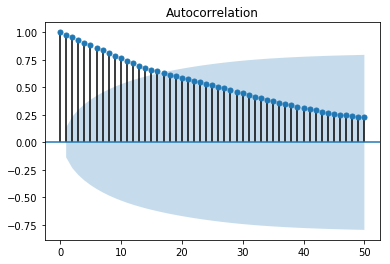

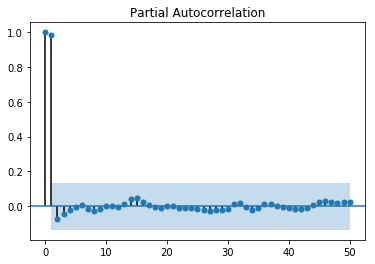

In [16]:
plot_city(menlo[0])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.ZHVI_AllHomes   No. Observations:                  206
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1989.196
Method:                       css-mle   S.D. of innovations           3766.583
Date:                Wed, 01 May 2019   AIC                           3986.392
Time:                        22:55:53   BIC                           3999.704
Sample:                    06-30-1996   HQIC                          3991.776
                         - 07-31-2013                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     45.1374    307.518      0.147      0.883    -557.588     647.863
ar.L1.D2.ZHVI_AllHomes     0.8044      0.052     15.423      0.000       0.702       0.907
ar.L

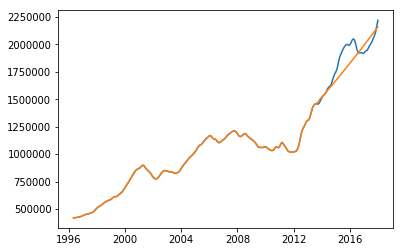

In [17]:
menlo_predicted = city_ARIMA(menlo, 2, 2, 0)
city_output(menlo, menlo_predicted)